In [4]:
from sklearn.datasets import make_regression
import numpy as np

In [5]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

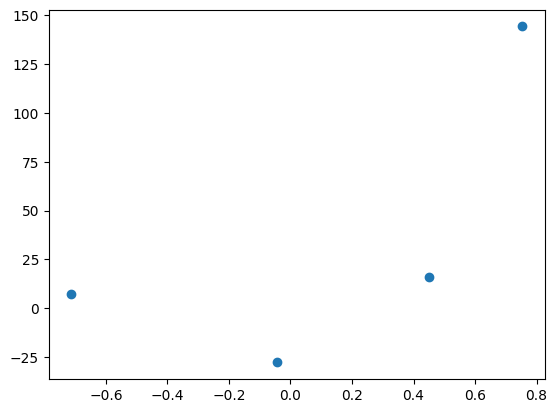

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [7]:
print(X.shape)
print(y.shape)

(4, 1)
(4,)


In [8]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [9]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [10]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [12]:
reg.coef_

array([78.35063668])

In [13]:
reg.intercept_

np.float64(26.15963284313262)

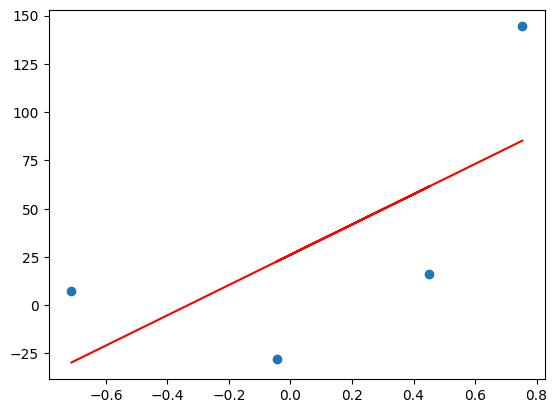

In [14]:
#Regression line
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

## **Gradient Descent**

In [15]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100).reshape(4)
print(y_pred.shape)

(4,)


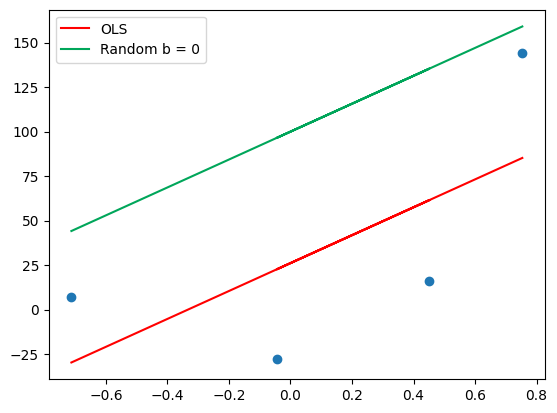

In [16]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='Random b = 0')
plt.legend()
plt.show()

### Iteration - 1

In [17]:
m = 78.35
b = 0

In [18]:
#loss_slope at b=0
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [19]:
#Lets take learning rate, lr = 0.1

lr = 0.1

step_size = loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [20]:
#Calculating the new intercept, bnew

b = b - step_size
b

np.float64(20.927763408209216)

In [21]:
((78.35*X) + b).reshape(4)

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

In [22]:
y_pred1 = ((78.35*X) + b).reshape(4)

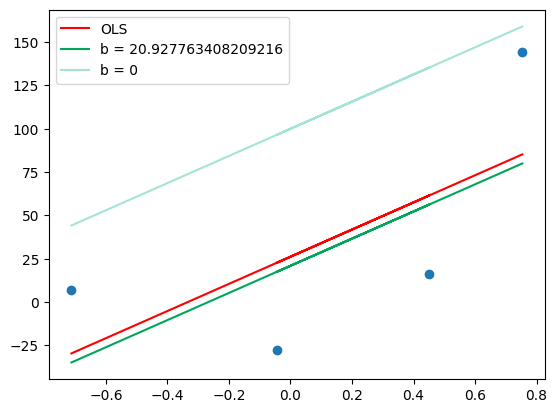

In [23]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

### Iteration - 2

In [24]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-41.85552681641843)

In [25]:
step_size = loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [26]:
b = b - step_size
b

np.float64(25.11331608985106)

In [27]:
y_pred2 = ((78.35*X) + b).reshape(4)

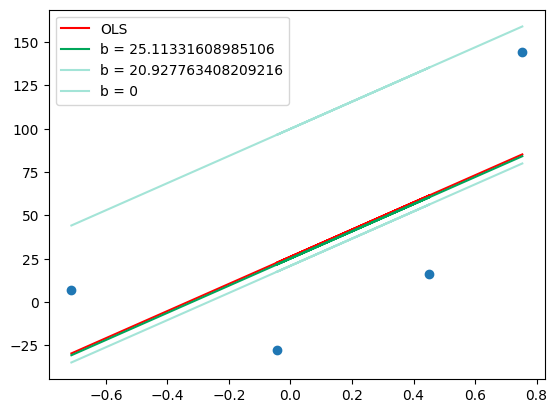

In [28]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(20.927763408209216))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

### Iteration - 3

In [29]:
loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-8.371105363283675)

In [30]:
step_size = loss_slope*lr
step_size

np.float64(-0.8371105363283675)

In [31]:
b = b - step_size
b

np.float64(25.95042662617943)

In [32]:
y_pred3 = ((78.35 * X) + b).reshape(4)
y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

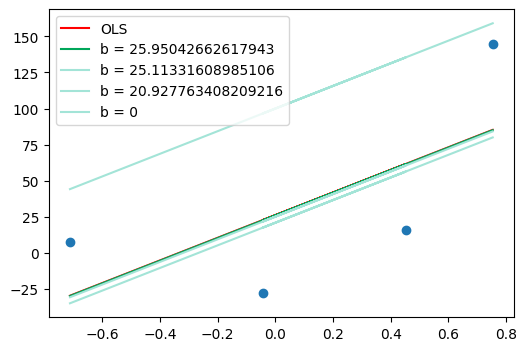

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(25.11331608985106))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(20.927763408209216))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

### With Epochs

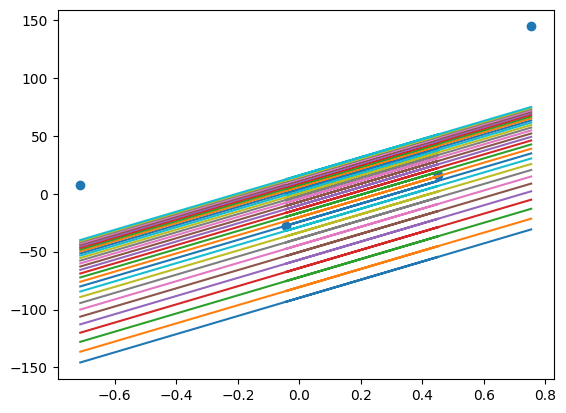

In [34]:
m = 78.35 #slope
b = -100 #intercept
lr = 0.01 #learning rate

epochs = 30 # (no. of iterations)

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)